This project is to drill down on high impact, high intent and low effort keywords that Rocketium.com can rank for in the months spanning January-June 2020.

# Methodology
1. Import and merge data from CSV
2. 

# Gathering
I gathered data from ahrefs for this project. For sites which had upward of 10000 keywords, I reduced the number of keywords by filtering keyword difficulty between 0 and 40.

In [214]:
# Import the libraries that we will need in this project
import pandas as pd
import datetime as dt
import numpy as np
import requests
import json
import re
import time

In [215]:
df = pd.read_csv('Merged.csv', encoding='latin-1')

In [216]:
df

,#,Keyword,Position,Position History,Position History Date,Volume,URL,Difficulty,Traffic (desc),CPC,Last Update,Page URL inside,SERP Features,Website
0,1,apptus,1,1,NaN,2900,https://www.apptus.com/,1,778.0,3.0,1/23/2020 6:45,NaN,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
1,2,apptus,1,1,NaN,2900,https://www.apptus.com/career,1,14.0,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
2,3,apptus,1,1,NaN,2900,https://www.apptus.com/customers,1,14.0,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
3,4,apptus,1,1,NaN,2900,https://www.apptus.com/about,1,14.0,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
4,5,apptus,1,1,NaN,2900,https://www.apptus.com/product/esales-enterprise,1,14.0,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40367,40368,visual v,80,78,1/11/2020 20:51,1600,https://www.visme.co/,28,0.0,NaN,1/20/2020 9:39,NaN,"Top stories, Thumbnail",visme.co
40368,40369,v-create,91,89,1/6/2020 10:55,1500,https://www.visme.co/,1,0.0,NaN,1/14/2020 2:28,NaN,"Sitelinks, Top stories, Thumbnail, People also...",visme.co
40369,40370,red backrounds,78,78,NaN,250,https://www.visme.co/templates/presentations/r...,2,0.0,NaN,12/27/2019 20:12,NaN,"Image pack, Top stories, Thumbnail",visme.co
40370,40371,yello background,64,61,12/9/2019 21:09,200,https://www.visme.co/templates/presentations/y...,1,0.0,NaN,1/9/2020 0:27,NaN,"Image pack, Top stories, Thumbnail, Video",visme.co


In [217]:
# List to store the dictionaries of our result
final_list = []
# List to store tweet_id of errors
error_list = []
# Calculate the time of execution
start = time.time()

# Assess

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40372 entries, 0 to 40371
Data columns (total 14 columns):
#                        40372 non-null int64
Keyword                  40372 non-null object
Position                 40372 non-null int64
Position History         40372 non-null int64
Position History Date    24976 non-null object
Volume                   40372 non-null int64
URL                      40372 non-null object
Difficulty               40372 non-null int64
Traffic (desc)           40372 non-null float64
CPC                      20296 non-null float64
Last Update              40372 non-null object
Page URL inside          2654 non-null object
SERP Features            39893 non-null object
Website                  39672 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 4.3+ MB


In [175]:
df.describe()

,#,Position,Position History,Volume,Difficulty,Traffic (desc),CPC
count,40372.000000,40372.000000,40372.000000,40372.000000,40372.000000,40372.000000,20296.000000
mean,20186.500000,50.436367,50.437481,424.764193,15.250347,4.507599,4.547153
std,11654.536871,29.214735,29.296437,4361.700212,14.962861,115.072097,6.917399
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.010000
25%,10093.750000,26.000000,25.000000,40.000000,3.000000,0.000000,0.900000
50%,20186.500000,51.000000,51.000000,100.000000,11.000000,0.000000,2.500000
75%,30279.250000,75.000000,76.000000,250.000000,25.000000,0.070000,5.000000
max,40372.000000,103.000000,103.000000,387000.000000,98.000000,14552.000000,200.000000


In [176]:
df['Position'].value_counts()

1      997
66     460
53     457
34     457
3      457
      ... 
10     310
100    307
101    262
102    123
103     26
Name: Position, Length: 103, dtype: int64

In [219]:
df['Difficulty'].value_counts()

0     5716
1     2223
2     1993
3     1659
12    1573
      ... 
92       2
94       2
98       1
93       1
96       1
Name: Difficulty, Length: 98, dtype: int64

In [220]:
df['Keyword'].value_counts()

monetate personalization    28
visme timeline              27
evergage careers            18
monetate api                17
monetate blog               16
                            ..
add gif to email             1
flow chart templates         1
what is rich media           1
amplify marketing            1
free signage template        1
Name: Keyword, Length: 36280, dtype: int64

In [221]:
df[df.Keyword.duplicated()]

,#,Keyword,Position,Position History,Position History Date,Volume,URL,Difficulty,Traffic (desc),CPC,Last Update,Page URL inside,SERP Features,Website
1,2,apptus,1,1,NaN,2900,https://www.apptus.com/career,1,14.0,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
2,3,apptus,1,1,NaN,2900,https://www.apptus.com/customers,1,14.0,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
3,4,apptus,1,1,NaN,2900,https://www.apptus.com/about,1,14.0,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
4,5,apptus,1,1,NaN,2900,https://www.apptus.com/product/esales-enterprise,1,14.0,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
5,6,apptus,1,1,NaN,2900,https://www.apptus.com/log-in,1,14.0,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40331,40332,venn diagram generator,102,102,NaN,6300,https://www.visme.co/venn-diagram-maker/,39,0.0,0.5,1/22/2020 1:41,Knowledge panel,"People also ask, Top stories, Thumbnail, Knowl...",visme.co
40333,40334,bubble map maker,102,102,NaN,500,https://www.visme.co/mind-map-maker/,13,0.0,2.5,1/20/2020 22:50,Knowledge panel,"Sitelinks, People also ask, Video, Knowledge p...",visme.co
40336,40337,make a bar graph online,101,101,NaN,450,https://www.visme.co/bar-graph-maker/,38,0.0,3.0,1/7/2020 13:23,Image pack,"People also ask, Top stories, Thumbnail, Image...",visme.co
40337,40338,create a scatter plot,73,101,1/7/2020 6:53,800,https://www.visme.co/scatter-plot-maker/,21,0.0,2.0,1/15/2020 10:38,Image pack,"Featured snippet, Thumbnail, Top stories, Peop...",visme.co


In [222]:
df_clean = df.copy()

In [223]:
# Select the columns to melt and to remain
columns_to_melt = ['Position History', 'Position History Date', 'Last Update', 'URL','#', 'Traffic (desc)', 'CPC']
columns_to_keep = ['Keyword', 'Position', 'Volume', 'Difficulty', 'Page URL inside', 'SERP Features', 'Website']

In [224]:
df_clean = df_clean.drop(['Position History', 'Position History Date', 'Last Update', 'URL','#', 'Traffic (desc)', 'CPC'], axis = 1) 

In [225]:
df_clean

,Keyword,Position,Volume,Difficulty,Page URL inside,SERP Features,Website
0,apptus,1,2900,1,NaN,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
1,apptus,1,2900,1,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
2,apptus,1,2900,1,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
3,apptus,1,2900,1,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
4,apptus,1,2900,1,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com
...,...,...,...,...,...,...,...
40367,visual v,80,1600,28,NaN,"Top stories, Thumbnail",visme.co
40368,v-create,91,1500,1,NaN,"Sitelinks, Top stories, Thumbnail, People also...",visme.co
40369,red backrounds,78,250,2,NaN,"Image pack, Top stories, Thumbnail",visme.co
40370,yello background,64,200,1,NaN,"Image pack, Top stories, Thumbnail, Video",visme.co


In [227]:
df_clean = df_clean.drop_duplicates('Keyword', keep = 'last')

In [228]:
df_clean = df_clean.replace({'Difficulty': 0}, 1)

In [229]:
df_clean['Difficulty'].value_counts()

1     7330
2     1801
3     1496
12    1408
4     1308
      ... 
92       2
94       2
98       1
93       1
96       1
Name: Difficulty, Length: 97, dtype: int64

In [230]:
df_clean['Coefficient'] = df_clean.Volume/df_clean.Difficulty

In [231]:
df_clean

,Keyword,Position,Volume,Difficulty,Page URL inside,SERP Features,Website,Coefficient
6,apptus,1,2900,1,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com,2900.000000
12,apttus,16,7100,12,NaN,"Adwords top, Sitelinks, People also ask, Tweet...",apptus.com,591.666667
14,apptus careers,7,60,3,NaN,People also ask,apptus.com,20.000000
18,all about e,20,1400,1,NaN,"Knowledge card, Sitelinks, Top stories, Thumbnail",apptus.com,1400.000000
19,esales,13,700,6,NaN,"Adwords top, Sitelinks, Top stories, Thumbnail",apptus.com,116.666667
...,...,...,...,...,...,...,...,...
40367,visual v,80,1600,28,NaN,"Top stories, Thumbnail",visme.co,57.142857
40368,v-create,91,1500,1,NaN,"Sitelinks, Top stories, Thumbnail, People also...",visme.co,1500.000000
40369,red backrounds,78,250,2,NaN,"Image pack, Top stories, Thumbnail",visme.co,125.000000
40370,yello background,64,200,1,NaN,"Image pack, Top stories, Thumbnail, Video",visme.co,200.000000


In [232]:
df_clean.describe()

,Position,Volume,Difficulty,Coefficient
count,36280.000000,36280.000000,36280.000000,36280.000000
mean,53.484840,431.117420,15.223870,75.605222
std,27.765453,4569.034978,14.920011,516.477234
min,1.000000,10.000000,1.000000,0.102041
25%,31.000000,30.000000,2.000000,4.000000
50%,54.000000,100.000000,11.000000,11.952381
75%,77.000000,200.000000,24.000000,40.000000
max,103.000000,387000.000000,98.000000,43000.000000


In [233]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

%matplotlib inline

In [234]:
matplotlib.style.use('ggplot')

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

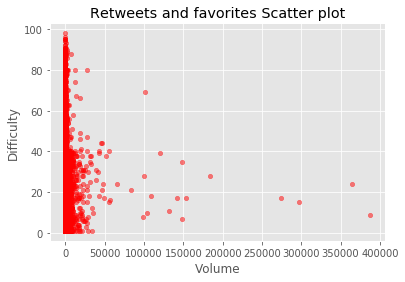

In [235]:
df_clean.plot(kind = 'scatter', x = 'Volume', y = 'Difficulty', alpha = 0.5, color = 'red')
plt.xlabel('Volume')
plt.ylabel('Difficulty')
plt.title('Retweets and favorites Scatter plot')

In [236]:
df_priority = []

In [237]:
df_priority = df_clean[(df_clean['Difficulty'] >= 1) & (df_clean['Difficulty'] <= 40)]

In [238]:
df_priority.head()

,Keyword,Position,Volume,Difficulty,Page URL inside,SERP Features,Website,Coefficient
6,apptus,1,2900,1,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com,2900.000000
12,apttus,16,7100,12,NaN,"Adwords top, Sitelinks, People also ask, Tweet...",apptus.com,591.666667
14,apptus careers,7,60,3,NaN,People also ask,apptus.com,20.000000
18,all about e,20,1400,1,NaN,"Knowledge card, Sitelinks, Top stories, Thumbnail",apptus.com,1400.000000
19,esales,13,700,6,NaN,"Adwords top, Sitelinks, Top stories, Thumbnail",apptus.com,116.666667


In [201]:
df_priority = df_priority[(df_priority['Volume'] >= 100) & (df_priority['Volume'] <= 5000)]

In [202]:
df_priority.head()

,#,Keyword,Position,Position History,Position History Date,Volume,URL,Difficulty,Traffic (desc),CPC,Last Update,Page URL inside,SERP Features,Website,Coefficient
6,7,apptus,1,1,NaN,2900,https://www.apptus.com/contact,1,14.00,3.0,1/23/2020 6:45,Sitelinks,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com,2900.000000
18,19,all about e,20,20,NaN,1400,https://www.apptus.com/blog,1,2.00,0.1,1/17/2020 13:45,NaN,"Knowledge card, Sitelinks, Top stories, Thumbnail",apptus.com,1400.000000
19,20,esales,13,25,1/10/2020 21:36,700,https://www.apptus.com/solutions/esales-apps,6,1.80,0.8,1/19/2020 2:57,NaN,"Adwords top, Sitelinks, Top stories, Thumbnail",apptus.com,116.666667
21,22,apttus wiki,13,13,NaN,150,https://www.apptus.com/,12,1.70,16.0,1/10/2020 11:09,NaN,"People also ask, Image pack",apptus.com,12.500000
29,30,esale,18,18,NaN,500,https://www.apptus.com/,21,0.52,0.7,1/22/2020 7:13,NaN,"Adwords top, Sitelinks, Top stories, Thumbnail",apptus.com,23.809524


In [239]:
df_priority.Keyword.str.contains("banner")

6        False
12       False
14       False
18       False
19       False
         ...  
40367    False
40368    False
40369    False
40370    False
40371    False
Name: Keyword, Length: 34685, dtype: bool

In [240]:
df_ecommerce = df_priority[df_priority.Keyword.str.contains("ecommerce")]
df_ecommerce

,Keyword,Position,Volume,Difficulty,Page URL inside,SERP Features,Website,Coefficient
32,apttus ecommerce,12,30,1,NaN,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com,30.000000
84,ecommerce banners,28,40,1,NaN,"Adwords top, Sitelinks, Top stories, Thumbnail...",apptus.com,40.000000
125,ecommerce site search solutions,33,20,3,NaN,"Adwords top, Sitelinks, Featured snippet, Thum...",apptus.com,6.666667
130,ecommerce navigation,34,20,6,NaN,"Adwords top, Sitelinks, Adwords bottom, Knowle...",apptus.com,3.333333
133,ecommerce search solutions,33,10,3,NaN,"Adwords top, Sitelinks, Adwords bottom",apptus.com,3.333333
...,...,...,...,...,...,...,...,...
30626,making a living with ecommerce,99,30,23,NaN,"Adwords top, Sitelinks, Featured snippet, Peop...",springbot.com,1.304348
30633,masters in ecommerce,100,30,1,NaN,People also ask,springbot.com,30.000000
30644,features of ecommerce,99,20,14,NaN,"Featured snippet, Thumbnail, Top stories",springbot.com,1.428571
30653,ecommerce loyalty software,98,10,26,NaN,"Sitelinks, People also ask",springbot.com,0.384615


In [241]:
df_banner = df_priority[df_priority.Keyword.str.contains("banner")]

In [242]:
df_generat= df_priority[df_priority.Keyword.str.contains("generat")]
df_generat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 573 to 40365
Data columns (total 8 columns):
Keyword            326 non-null object
Position           326 non-null int64
Volume             326 non-null int64
Difficulty         326 non-null int64
Page URL inside    22 non-null object
SERP Features      323 non-null object
Website            325 non-null object
Coefficient        326 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 22.9+ KB


In [243]:
df_maker = df_priority[df_priority.Keyword.str.contains("maker")]

In [244]:
df_automat = df_priority[df_priority.Keyword.str.contains("automat")]

In [252]:
df_creat = df_priority[df_priority.Keyword.str.contains("creat")]

In [258]:
df_software = df_priority[df_priority.Keyword.str.contains("software")]

In [247]:
df_ecommerce.to_csv('df_ecommerce.csv', encoding = 'utf-8')

In [248]:
df_generat.to_csv('df_generat.csv', encoding = 'utf-8')

In [249]:
df_maker.to_csv('df_maker.csv', encoding = 'utf-8')

In [250]:
df_banner.to_csv('df_banner.csv', encoding = 'utf-8')

In [255]:
df_automat.to_csv('df_automat.csv', encoding = 'utf-8')

In [259]:
df_software.to_csv('df_software.csv', encoding = 'utf-8')

In [256]:
df_creat.to_csv('df_creat.csv', encoding = 'utf-8')